In [1]:
import mdtraj

In [2]:
def load_pdb(pdb_path):
    return mdtraj.load(pdb_path)

crystal = load_pdb('../Inputs/6d1r.pdb')
colab = load_pdb('../Inputs/6d1r_colab/6d1r_0e9b1_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb')
greene = load_pdb('../Inputs/6d1r_greene/unrelaxed_model_1_pred_0.pdb')

In [3]:
def align_protein(ref, target):
    # ref_indices = ref.topology.select('name CA')
    target_indices = target.topology.select('name CA')
    return target.superpose(ref, atom_indices=target_indices)

colab = align_protein(crystal, colab)
greene = align_protein(crystal, greene)

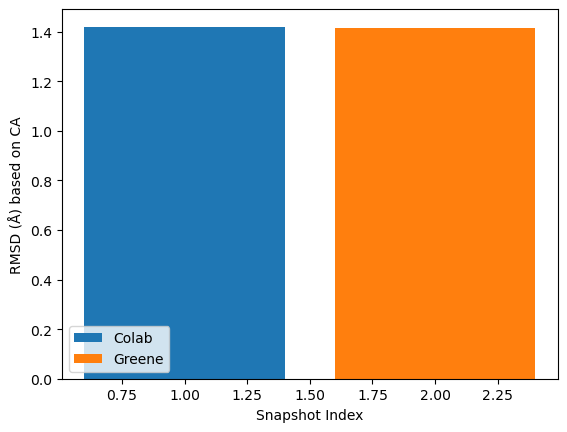

In [4]:
ref_indices = colab.topology.select('name CA')
rmsd_colab = mdtraj.rmsd(colab, crystal, atom_indices=ref_indices)
ref_indices = greene.topology.select('name CA')
rmsd_greene = mdtraj.rmsd(greene, crystal, atom_indices=ref_indices)

import matplotlib.pyplot as plt

plt.bar(x=1, height=rmsd_colab)
plt.bar(x=2, height=rmsd_greene)
plt.xlabel('Snapshot Index')
plt.ylabel('RMSD (Å) based on CA')
plt.legend(['Colab', 'Greene'], loc='lower left')
plt.show()

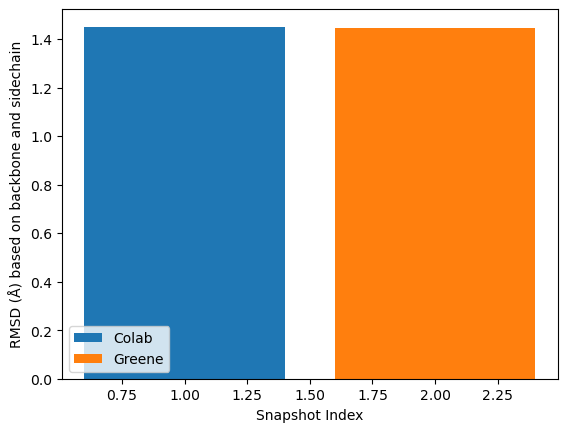

In [36]:
ref_indices = colab.topology.select('backbone or sidechain')
rmsd_colab = mdtraj.rmsd(colab, crystal, atom_indices=ref_indices)
ref_indices = greene.topology.select('backbone or sidechain')
rmsd_greene = mdtraj.rmsd(greene, crystal, atom_indices=ref_indices)

import matplotlib.pyplot as plt

plt.bar(x=1, height=rmsd_colab)
plt.bar(x=2, height=rmsd_greene)
plt.xlabel('Snapshot Index')
plt.ylabel('RMSD (Å) based on backbone and sidechain')
plt.legend(['Colab', 'Greene'], loc='lower left')
plt.show()

In [5]:
pip install py3dmol

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
with open('../Inputs/6d1r_greene/unrelaxed_model_1_pred_0.pdb', 'r') as pdb_file:
    lines = pdb_file.readlines()

plddt_scores = {}

for line in lines:
    if line.startswith('ATOM'):
        fields = line.split()
        if len(fields) >= 11:
            residue_number = fields[5]
            plddt_score = float(fields[10])
            if residue_number not in plddt_scores:
                plddt_scores[residue_number] = []
            plddt_scores[residue_number] = np.mean(plddt_score)

In [11]:
import py3Dmol

with open('../Inputs/6d1r_greene/unrelaxed_model_1_pred_0.pdb', 'r') as pdb_file:
    pdb_data = pdb_file.read()

viewer = py3Dmol.view(width=300, height=300)
viewer.addModel(pdb_data, 'pdb')

def color_map(plddt):
    min_plddt = min(plddt_scores.values())
    max_plddt = max(plddt_scores.values())
    
    normalized_plddt = (plddt - min_plddt) / (max_plddt - min_plddt)
    
    r = int(255 * normalized_plddt)
    b = int(255 * (1 - normalized_plddt))
    return f'rgb({r}, 0, {b})'

for residue_number, plddt in plddt_scores.items():
    color = color_map(plddt)
    viewer.setStyle({'resi': residue_number}, {'cartoon': {'color': color}})

viewer.zoomTo()
viewer.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol